<a href="https://colab.research.google.com/github/amanchauhan786/HoneyWell_F-BManufacturing/blob/main/HoneyWell_Brew_F%26BManufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==============================================================================
# Honeywell F&B Manufacturing: Process Anomaly Prediction
# Notebook 01: Data Cleaning and Preprocessing
# ==============================================================================
#
# Objective: To inspect the raw brewery dataset for quality issues, perform
#            necessary cleaning actions, and detect/handle outliers to create a
#            robust dataset for feature engineering and modeling.
#
# ==============================================================================

## 1. Setup and Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

try:
    raw_df = pd.read_csv('brewery_data.csv')
    print("Raw dataset loaded successfully.")
    print(f"Shape of raw data: {raw_df.shape}")
except FileNotFoundError:
    print("Error: 'brewery_data.csv' not found. Please ensure it's in the correct directory.")
    exit()

df = raw_df.copy()

Raw dataset loaded successfully.
Shape of raw data: (583, 20)


In [2]:
print("\n--- 2. Data Quality Inspection ---")
print("\n[INFO] Checking for missing values per column:")
print(df.isnull().sum())
if df.isnull().sum().sum() == 0:
    print("Status: No missing values found.")
print(f"\n[INFO] Number of duplicate rows found: {df.duplicated().sum()}")
if df.duplicated().sum() == 0:
    print("Status: No duplicate rows found.")
print("\n[INFO] Initial data types:")
print(df.info())


--- 2. Data Quality Inspection ---

[INFO] Checking for missing values per column:
Batch_ID                        0
Brew_Date                       0
Beer_Style                      0
SKU                             0
Location                        0
Fermentation_Time               0
Temperature                     0
pH_Level                        0
Gravity                         0
Alcohol_Content                 0
Bitterness                      0
Color                           0
Ingredient_Ratio                0
Volume_Produced                 0
Total_Sales                     0
Quality_Score                   0
Brewhouse_Efficiency            0
Loss_During_Brewing             0
Loss_During_Fermentation        0
Loss_During_Bottling_Kegging    0
dtype: int64
Status: No missing values found.

[INFO] Number of duplicate rows found: 0
Status: No duplicate rows found.

[INFO] Initial data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (t

In [3]:
print("\n--- 3. Data Cleaning and Type Correction ---")
df['Brew_Date'] = pd.to_datetime(df['Brew_Date'])
print("\n'Brew_Date' column converted to datetime format.")
print("\n[INFO] Data types after correction:")
print(df.dtypes)


--- 3. Data Cleaning and Type Correction ---

'Brew_Date' column converted to datetime format.

[INFO] Data types after correction:
Batch_ID                                 int64
Brew_Date                       datetime64[ns]
Beer_Style                              object
SKU                                     object
Location                                object
Fermentation_Time                        int64
Temperature                            float64
pH_Level                               float64
Gravity                                float64
Alcohol_Content                        float64
Bitterness                               int64
Color                                    int64
Ingredient_Ratio                        object
Volume_Produced                          int64
Total_Sales                            float64
Quality_Score                          float64
Brewhouse_Efficiency                   float64
Loss_During_Brewing                    float64
Loss_During_Fermentat


--- 4. Outlier Detection and Marking (IQR Method) ---

[INFO] Visualizing potential outliers using boxplots:


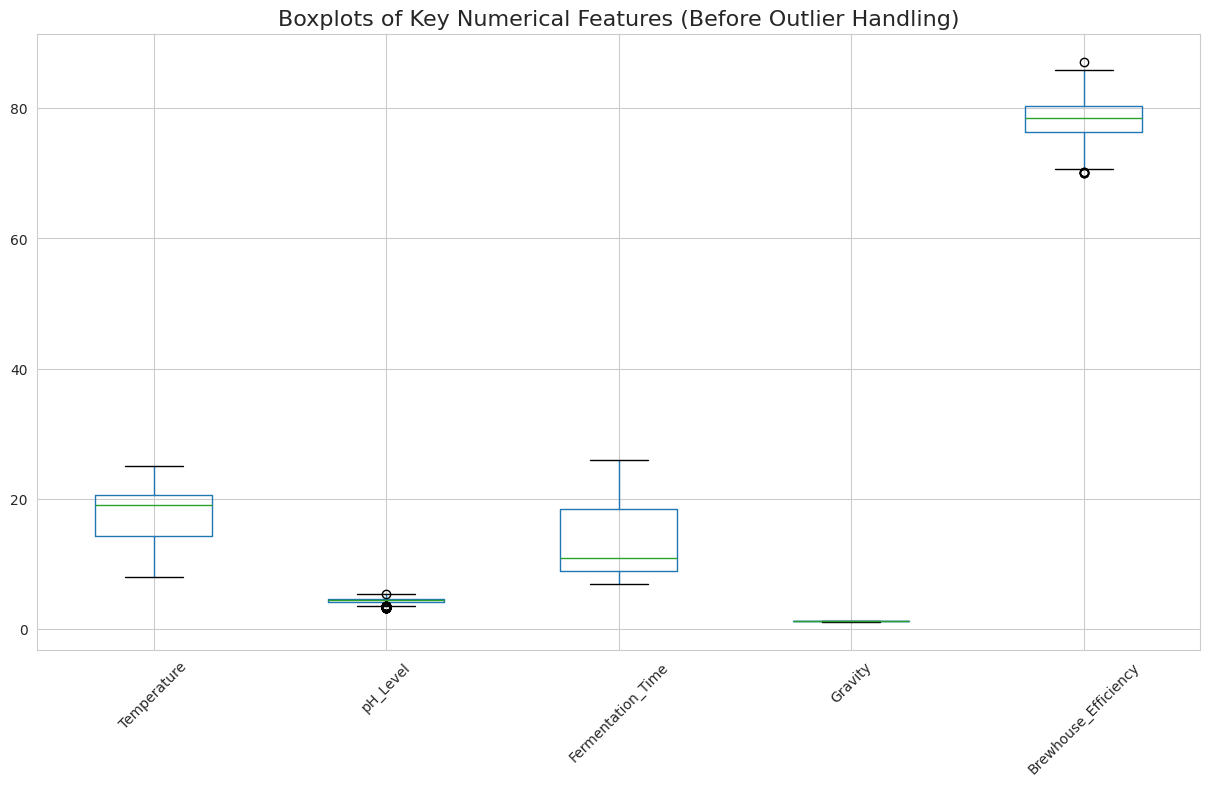

In [4]:
print("\n--- 4. Outlier Detection and Marking (IQR Method) ---")
outlier_columns = ['Temperature', 'pH_Level', 'Fermentation_Time', 'Gravity', 'Brewhouse_Efficiency']
print("\n[INFO] Visualizing potential outliers using boxplots:")
plt.figure(figsize=(15, 8))
df[outlier_columns].boxplot()
plt.title("Boxplots of Key Numerical Features (Before Outlier Handling)", fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [5]:
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a new column to mark outliers
    outlier_flag_col = f'{col}_is_outlier'
    df[outlier_flag_col] = (df[col] < lower_bound) | (df[col] > upper_bound)

    outlier_count = df[outlier_flag_col].sum()
    print(f"🔎 Found and marked {outlier_count} outliers in the '{col}' column.")
print("\n[INFO] Outlier flags have been added as new columns to the DataFrame.")
print("Example of marked outliers:")
display(df[df['Temperature_is_outlier'] == True].head())

🔎 Found and marked 0 outliers in the 'Temperature' column.
🔎 Found and marked 42 outliers in the 'pH_Level' column.
🔎 Found and marked 0 outliers in the 'Fermentation_Time' column.
🔎 Found and marked 0 outliers in the 'Gravity' column.
🔎 Found and marked 6 outliers in the 'Brewhouse_Efficiency' column.

[INFO] Outlier flags have been added as new columns to the DataFrame.
Example of marked outliers:


,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,...,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,Temperature_is_outlier,pH_Level_is_outlier,Fermentation_Time_is_outlier,Gravity_is_outlier,Brewhouse_Efficiency_is_outlier


In [6]:
print("\n--- 5. Saving the Cleaned Data ---")
try:
    import os
    if not os.path.exists('data/cleaned'):
        os.makedirs('data/cleaned')
    cleaned_file_path = 'data/cleaned/cleaned_brewery_data.csv'
    df.to_csv(cleaned_file_path, index=False)
    print(f"Cleaned data successfully saved to: {cleaned_file_path}")
    print(f"Shape of cleaned data: {df.shape}")

except Exception as e:
    print(f"Error saving file: {e}")

print("\n--- Preprocessing Complete ---")


--- 5. Saving the Cleaned Data ---
Cleaned data successfully saved to: data/cleaned/cleaned_brewery_data.csv
Shape of cleaned data: (583, 25)

--- Preprocessing Complete ---


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

try:
    cleaned_df = pd.read_csv('data/cleaned/cleaned_brewery_data.csv')
    print("Cleaned dataset loaded successfully.")
    print(f"Shape of cleaned data: {cleaned_df.shape}")
except FileNotFoundError:
    print("Error: 'data/cleaned/cleaned_brewery_data.csv' not found.")
    print("Please run the '01_preprocessing.ipynb' notebook first.")
    exit()

df_feat = cleaned_df.copy()

df_feat['Brew_Date'] = pd.to_datetime(df_feat['Brew_Date'])

Cleaned dataset loaded successfully.
Shape of cleaned data: (583, 25)


In [8]:
print("\n--- 2. Creating Date-Based Features ---")

df_feat['Brew_Month'] = df_feat['Brew_Date'].dt.month
df_feat['Brew_DayOfWeek'] = df_feat['Brew_Date'].dt.dayofweek  # Monday=0, Sunday=6
df_feat['Brew_WeekOfYear'] = df_feat['Brew_Date'].dt.isocalendar().week.astype(int)

print("Created 'Brew_Month', 'Brew_DayOfWeek', and 'Brew_WeekOfYear' features.")
display(df_feat[['Brew_Date', 'Brew_Month', 'Brew_DayOfWeek', 'Brew_WeekOfYear']].head())



--- 2. Creating Date-Based Features ---
Created 'Brew_Month', 'Brew_DayOfWeek', and 'Brew_WeekOfYear' features.


,Brew_Date,Brew_Month,Brew_DayOfWeek,Brew_WeekOfYear
0,2020-01-01,1,2,1
1,2020-01-01,1,2,1
2,2020-01-01,1,2,1
3,2020-01-02,1,3,1
4,2020-01-02,1,3,1


In [9]:
print("\n--- 3. Parsing 'Ingredient_Ratio' Feature ---")

# Split the string '1:0.33:0.11' into three separate columns
ratio_cols = ['Ratio_Malt', 'Ratio_Hops', 'Ratio_Yeast']
df_feat[ratio_cols] = df_feat['Ingredient_Ratio'].str.split(':', expand=True).astype(float)

# We can now drop the original string column
df_feat = df_feat.drop('Ingredient_Ratio', axis=1)

print("Parsed 'Ingredient_Ratio' into three numerical columns.")
display(df_feat[ratio_cols].head())


--- 3. Parsing 'Ingredient_Ratio' Feature ---
Parsed 'Ingredient_Ratio' into three numerical columns.


,Ratio_Malt,Ratio_Hops,Ratio_Yeast
0,1.0,0.33,0.11
1,1.0,0.26,0.14
2,1.0,0.45,0.17
3,1.0,0.38,0.12
4,1.0,0.28,0.11


In [10]:
print("\n--- 4. Creating Rolling Features (Based on Previous Batches) ---")

df_feat = df_feat.sort_values(by='Brew_Date').reset_index(drop=True)
rolling_cols = ['Temperature', 'pH_Level', 'Fermentation_Time', 'Brewhouse_Efficiency']
window_size = 5

for col in rolling_cols:
    df_feat[f'{col}_rolling_mean'] = df_feat[col].shift(1).rolling(window=window_size).mean()
    df_feat[f'{col}_rolling_std'] = df_feat[col].shift(1).rolling(window=window_size).std()

for col in df_feat.columns:
    if '_rolling_mean' in col or '_rolling_std' in col:
        df_feat[col].fillna(df_feat[col].mean(), inplace=True)

print(f"Created rolling mean and std features with a window of {window_size} batches.")
display(df_feat[[col for col in df_feat.columns if 'rolling' in col]].head(7))



--- 4. Creating Rolling Features (Based on Previous Batches) ---
Created rolling mean and std features with a window of 5 batches.


/tmp/ipython-input-2292428959.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_feat[col].fillna(df_feat[col].mean(), inplace=True)


,Temperature_rolling_mean,Temperature_rolling_std,pH_Level_rolling_mean,pH_Level_rolling_std,Fermentation_Time_rolling_mean,Fermentation_Time_rolling_std,Brewhouse_Efficiency_rolling_mean,Brewhouse_Efficiency_rolling_std
0,17.783114,3.728778,4.390381,0.395137,13.176471,5.127454,78.338693,2.701364
1,17.783114,3.728778,4.390381,0.395137,13.176471,5.127454,78.338693,2.701364
2,17.783114,3.728778,4.390381,0.395137,13.176471,5.127454,78.338693,2.701364
3,17.783114,3.728778,4.390381,0.395137,13.176471,5.127454,78.338693,2.701364
4,17.783114,3.728778,4.390381,0.395137,13.176471,5.127454,78.338693,2.701364
5,14.460000,4.615517,4.592000,0.247427,16.600000,7.700649,79.689378,4.056389
6,14.100000,4.757625,4.554000,0.222778,16.200000,7.328028,79.671767,4.047009


In [11]:
print("\n--- 5. Encoding Categorical Features ---")

categorical_cols = ['Beer_Style', 'SKU', 'Location']
df_feat = pd.get_dummies(df_feat, columns=categorical_cols, prefix=categorical_cols, drop_first=True)

print("Applied One-Hot Encoding to categorical columns.")
print(f"Shape of DataFrame after encoding: {df_feat.shape}")


--- 5. Encoding Categorical Features ---
Applied One-Hot Encoding to categorical columns.
Shape of DataFrame after encoding: (583, 54)


In [12]:
print("\n--- 6. Scaling Numerical Features ---")

features_to_scale = [
    col for col in df_feat.columns
    if col not in ['Batch_ID', 'Brew_Date', 'Quality_Score'] and '_is_outlier' not in col
]

scaler = StandardScaler()
df_feat[features_to_scale] = scaler.fit_transform(df_feat[features_to_scale])

print("Applied StandardScaler to all numerical features.")

import os
if not os.path.exists('models'):
    os.makedirs('models')
scaler_path = 'models/scaler.joblib'
joblib.dump(scaler, scaler_path)
print(f"Scaler object saved to '{scaler_path}'.")


--- 6. Scaling Numerical Features ---
Applied StandardScaler to all numerical features.
Scaler object saved to 'models/scaler.joblib'.


In [13]:
print("\n--- 7. Saving the Engineered Features ---")

if not os.path.exists('data/features'):
    os.makedirs('data/features')

features_file_path = 'data/features/engineered_features.csv'
df_feat.to_csv(features_file_path, index=False)

print(f"Engineered feature dataset successfully saved to: {features_file_path}")
print("Final DataFrame head:")
display(df_feat.head())

print("\n--- Feature Engineering Complete ---")


--- 7. Saving the Engineered Features ---
Engineered feature dataset successfully saved to: data/features/engineered_features.csv
Final DataFrame head:


,Batch_ID,Brew_Date,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Volume_Produced,...,SKU_Pints,Location_HSR Layout,Location_Indiranagar,Location_Jayanagar,Location_Koramangala,Location_Malleswaram,Location_Marathahalli,Location_Rajajinagar,Location_Whitefield,Location_Yelahanka
0,174131,2020-01-01,1.765992,-1.015680,0.928642,-0.786171,-0.511119,-1.638198,-0.944740,2.111498,...,1.661713,-0.306282,-0.351161,-0.306282,-0.33238,-0.316228,-0.363371,-0.329188,2.925299,-0.332380
1,174132,2020-01-01,1.946398,-1.240364,-0.235455,-0.730581,-0.621319,-0.582776,-0.423658,-1.963999,...,-0.601789,-0.306282,-0.351161,-0.306282,-0.33238,-0.316228,-0.363371,-0.329188,-0.341845,3.008608
2,174133,2020-01-01,-1.120494,0.132703,0.509567,0.770342,1.362290,1.264214,0.618505,-1.405186,...,-0.601789,-0.306282,-0.351161,-0.306282,-0.33238,-0.316228,-0.363371,-0.329188,-0.341845,3.008608
3,174134,2020-01-02,-0.579278,0.432282,1.114898,-0.897350,-0.951921,-0.758679,-1.726363,-0.668051,...,-0.601789,-0.306282,2.847696,-0.306282,-0.33238,-0.316228,-0.363371,-0.329188,-0.341845,-0.332380
4,174135,2020-01-02,1.044371,-2.438677,0.020646,-1.230889,-1.392723,-1.286391,-0.163117,-0.944866,...,-0.601789,-0.306282,-0.351161,-0.306282,-0.33238,-0.316228,2.752005,-0.329188,-0.341845,-0.332380



--- Feature Engineering Complete ---



--- Starting Step 6: Label Definition and Data Splitting ---

[INFO] Descriptive statistics for Quality_Score:


,Quality_Score
count,583.000000
mean,9.514237
std,0.462423
min,7.900000
25%,9.200000
50%,9.600000
75%,10.000000
max,10.000000


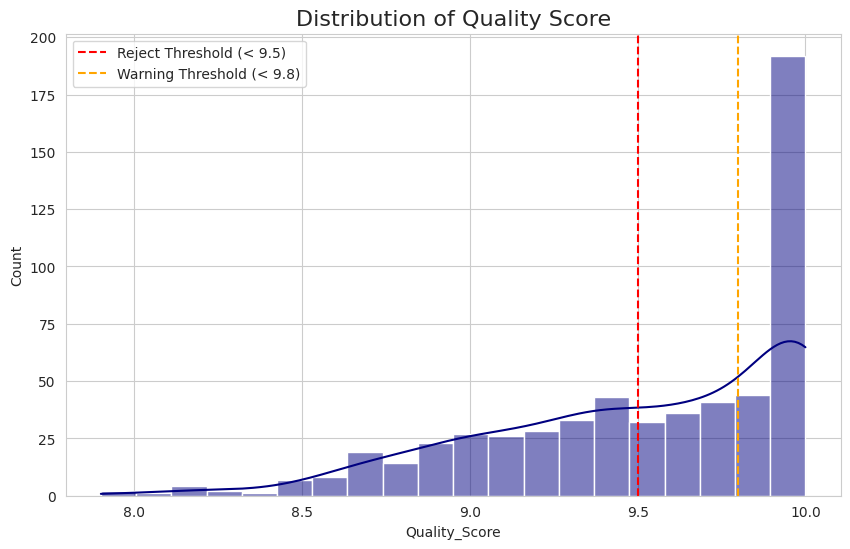


Created 'Quality_Label' column with three classes.


/tmp/ipython-input-1140403536.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quality_Label', data=df_feat, order=['OK', 'Warning', 'Reject'], palette='viridis')


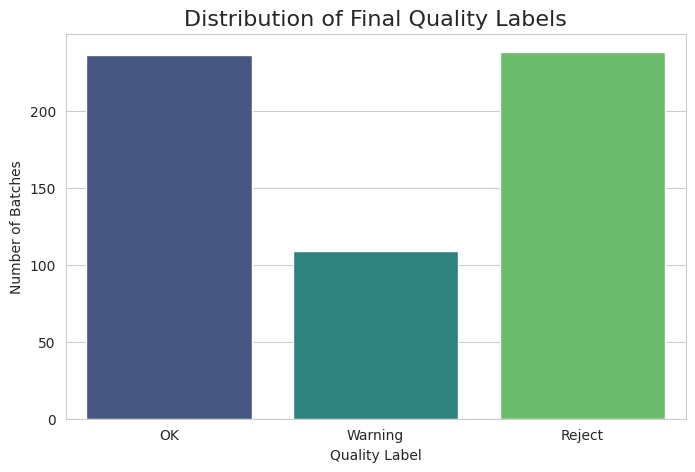


[INFO] Final class distribution:
Quality_Label
Reject     0.408233
OK         0.404803
Warning    0.186964
Name: proportion, dtype: float64


In [14]:
print("\n--- Starting Step 6: Label Definition and Data Splitting ---")

print("\n[INFO] Descriptive statistics for Quality_Score:")
display(df_feat['Quality_Score'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df_feat['Quality_Score'], kde=True, bins=20, color='navy')
plt.title('Distribution of Quality Score', fontsize=16)
plt.axvline(9.5, color='red', linestyle='--', label='Reject Threshold (< 9.5)')
plt.axvline(9.8, color='orange', linestyle='--', label='Warning Threshold (< 9.8)')
plt.legend()
plt.show()

REJECT_THRESHOLD = 9.5
WARNING_THRESHOLD = 9.8

def assign_label(score):
    if score < REJECT_THRESHOLD:
        return 'Reject'
    elif score < WARNING_THRESHOLD:
        return 'Warning'
    else:
        return 'OK'

df_feat['Quality_Label'] = df_feat['Quality_Score'].apply(assign_label)
print("\nCreated 'Quality_Label' column with three classes.")

plt.figure(figsize=(8, 5))
sns.countplot(x='Quality_Label', data=df_feat, order=['OK', 'Warning', 'Reject'], palette='viridis')
plt.title('Distribution of Final Quality Labels', fontsize=16)
plt.ylabel('Number of Batches')
plt.xlabel('Quality Label')
plt.show()

print("\n[INFO] Final class distribution:")
print(df_feat['Quality_Label'].value_counts(normalize=True))

In [15]:
print("\n--- Creating a Time-Based Holdout Test Set ---")

df_sorted = df_feat.sort_values(by='Brew_Date').reset_index(drop=True)

# Define the split size (e.g., 80% for training, 20% for testing)
test_size = 0.2
split_index = int(len(df_sorted) * (1 - test_size))

train_df = df_sorted.iloc[:split_index]
test_df = df_sorted.iloc[split_index:]

print(f"\nData split into training and testing sets.")
print(f"Training set size: {len(train_df)} batches")
print(f"Testing set size:  {len(test_df)} batches")

# ==============================================================================


--- Creating a Time-Based Holdout Test Set ---

Data split into training and testing sets.
Training set size: 466 batches
Testing set size:  117 batches


In [16]:
print("\n--- Saving the Outputs ---")

import os
if not os.path.exists('data'):
    os.makedirs('data')

labels_output = df_feat[['Batch_ID', 'Quality_Label']]
labels_output_path = 'data/labels.csv'
labels_output.to_csv(labels_output_path, index=False)
print(f"Labels successfully saved to: {labels_output_path}")

# Save the full training and testing sets
train_path = 'data/features/train_dataset.csv'
test_path = 'data/features/test_dataset.csv'
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)
print(f"Full training set saved to: {train_path}")
print(f"Full testing set saved to: {test_path}")


--- Saving the Outputs ---
Labels successfully saved to: data/labels.csv
Full training set saved to: data/features/train_dataset.csv
Full testing set saved to: data/features/test_dataset.csv


In [17]:
# Honeywell F&B Manufacturing: Process Anomaly Prediction

# Objective: To build and evaluate simple baseline models for anomaly detection.
#            This includes a basic supervised model (Logistic Regression),
#            unsupervised models (Isolation Forest, PCA), and a traditional
#            statistical method (Control Chart). These baselines will provide a
#            benchmark for more complex models later.
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

import os
if not os.path.exists('plots'):
    os.makedirs('plots')
try:
    train_df = pd.read_csv('data/features/train_dataset.csv')
    test_df = pd.read_csv('data/features/test_dataset.csv')
    print("Training and testing datasets loaded successfully.")
    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")
except FileNotFoundError:
    print("Error: train_dataset.csv or test_dataset.csv not found.")
    print("Please run the previous notebook (label creation and splitting) first.")
    exit()


Training and testing datasets loaded successfully.
Training set shape: (466, 55)
Testing set shape: (117, 55)


In [18]:
print("\n--- 2. Preparing Data for Modeling ---")

TARGET = 'Quality_Label'
features = [
    col for col in train_df.columns
    if col not in ['Batch_ID', 'Brew_Date', 'Quality_Score', TARGET]
]
X_train = train_df[features]
X_test = test_df[features]

y_train_binary = train_df[TARGET].apply(lambda x: 1 if x == 'Reject' else 0)
y_test_binary = test_df[TARGET].apply(lambda x: 1 if x == 'Reject' else 0)

print("Created binary target variable: 1 for 'Reject' (Anomaly), 0 for 'OK'/'Warning'.")
print("\nClass distribution in the test set:")
print(y_test_binary.value_counts(normalize=True))

# ==============================================================================


--- 2. Preparing Data for Modeling ---
Created binary target variable: 1 for 'Reject' (Anomaly), 0 for 'OK'/'Warning'.

Class distribution in the test set:
Quality_Label
0    0.606838
1    0.393162
Name: proportion, dtype: float64



--- 3. Training Baseline Model 1: Logistic Regression ---

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.73      0.52      0.61        71
           1       0.48      0.70      0.57        46

    accuracy                           0.59       117
   macro avg       0.61      0.61      0.59       117
weighted avg       0.63      0.59      0.59       117



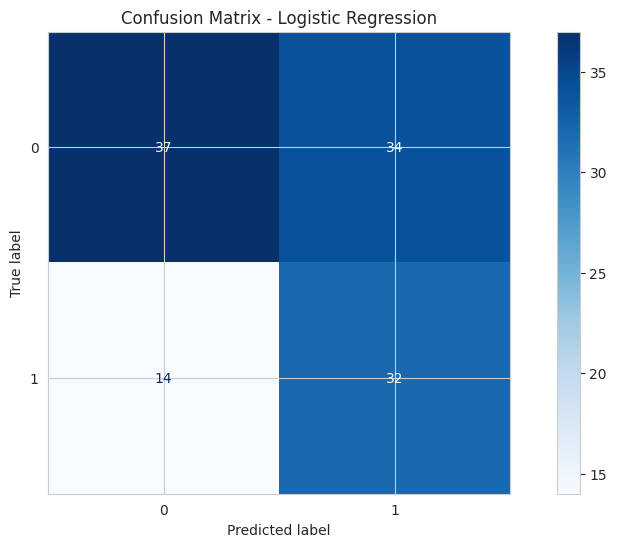

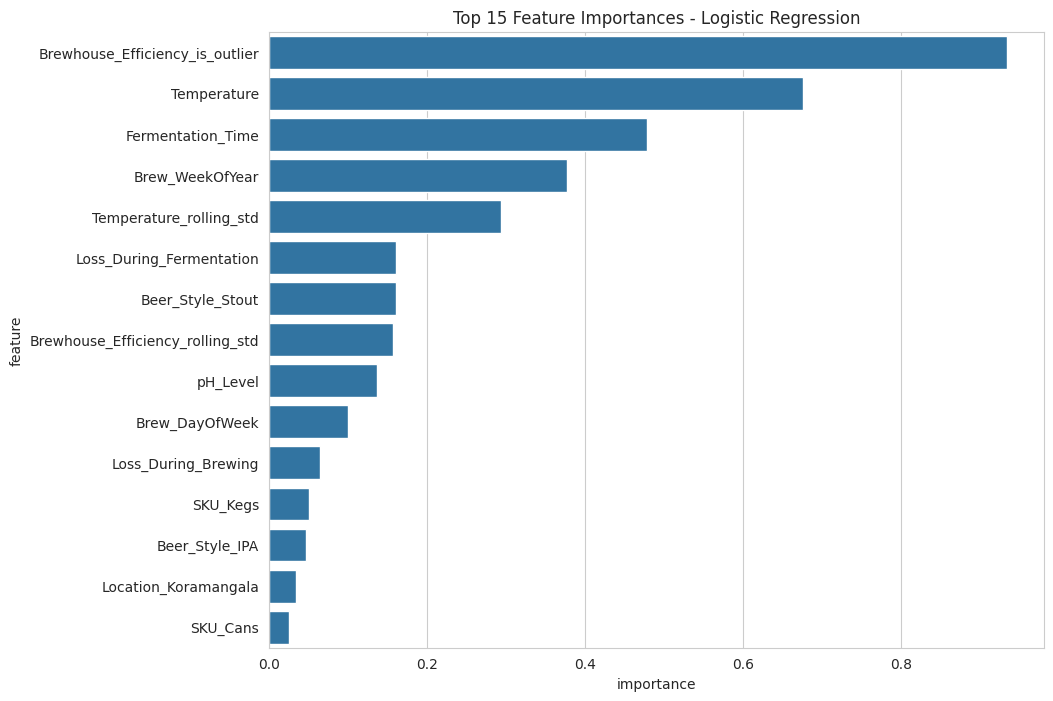

In [19]:
print("\n--- 3. Training Baseline Model 1: Logistic Regression ---")


log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train_binary)

y_pred_log_reg = log_reg.predict(X_test)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test_binary, y_pred_log_reg))

cm = confusion_matrix(y_test_binary, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig('plots/cm_logistic_regression.png')
plt.show()
feature_importance = pd.DataFrame({'feature': features, 'importance': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(15)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 15 Feature Importances - Logistic Regression')
plt.savefig('plots/feature_importance_logreg.png')
plt.show()


--- 4. Training Baseline Model 2: Isolation Forest ---

Classification Report (Isolation Forest):
              precision    recall  f1-score   support

           0       0.67      0.49      0.57        71
           1       0.45      0.63      0.52        46

    accuracy                           0.55       117
   macro avg       0.56      0.56      0.55       117
weighted avg       0.58      0.55      0.55       117



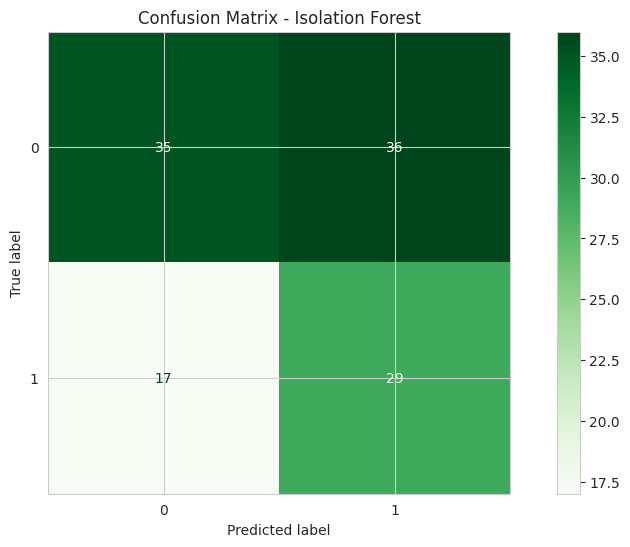

In [20]:
print("\n--- 4. Training Baseline Model 2: Isolation Forest ---")

contamination_rate = y_train_binary.value_counts(normalize=True)[1]
iso_forest = IsolationForest(contamination=contamination_rate, random_state=42)
iso_forest.fit(X_train)
preds_iso_forest = iso_forest.predict(X_test)
y_pred_iso_forest = np.array([1 if p == -1 else 0 for p in preds_iso_forest])

print("\nClassification Report (Isolation Forest):")
print(classification_report(y_test_binary, y_pred_iso_forest))

cm_iso = confusion_matrix(y_test_binary, y_pred_iso_forest)
disp_iso = ConfusionMatrixDisplay(confusion_matrix=cm_iso)
disp_iso.plot(cmap='Greens')
plt.title("Confusion Matrix - Isolation Forest")
plt.savefig('plots/cm_isolation_forest.png')
plt.show()


--- 5. Training Baseline Model 3: PCA Reconstruction Error ---


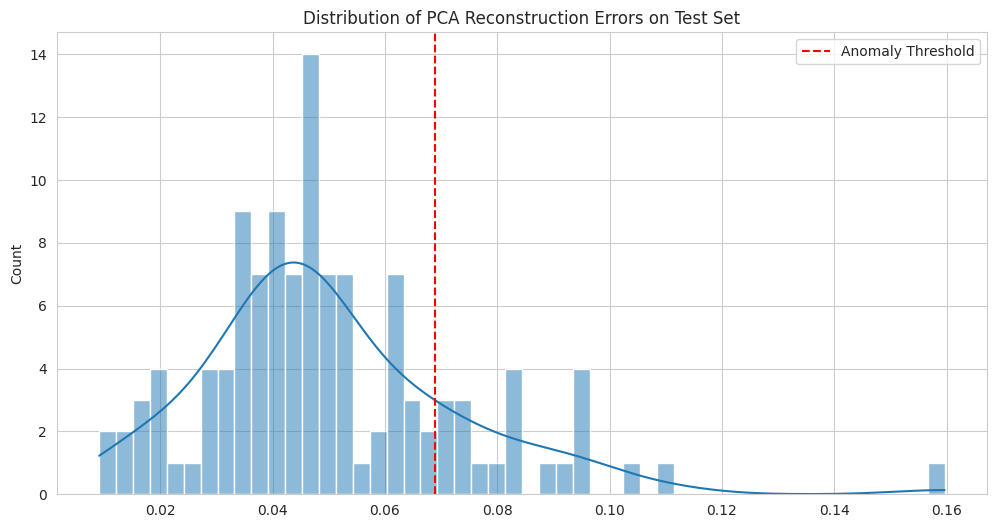


Classification Report (PCA Reconstruction Error):
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        71
           1       0.29      0.13      0.18        46

    accuracy                           0.53       117
   macro avg       0.43      0.46      0.42       117
weighted avg       0.47      0.53      0.48       117



In [21]:
print("\n--- 5. Training Baseline Model 3: PCA Reconstruction Error ---")

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_train_reconstructed = pca.inverse_transform(X_train_pca)
train_error = np.mean(np.square(X_train - X_train_reconstructed), axis=1)
threshold = np.quantile(train_error, 0.95) # Set threshold at 95th percentile

X_test_pca = pca.transform(X_test)
X_test_reconstructed = pca.inverse_transform(X_test_pca)
test_error = np.mean(np.square(X_test - X_test_reconstructed), axis=1)

y_pred_pca = (test_error > threshold).astype(int)

plt.figure()
sns.histplot(test_error, bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Distribution of PCA Reconstruction Errors on Test Set')
plt.legend()
plt.savefig('plots/pca_reconstruction_error.png')
plt.show()

print("\nClassification Report (PCA Reconstruction Error):")
print(classification_report(y_test_binary, y_pred_pca))


--- 6. Creating a Control Chart for Temperature ---


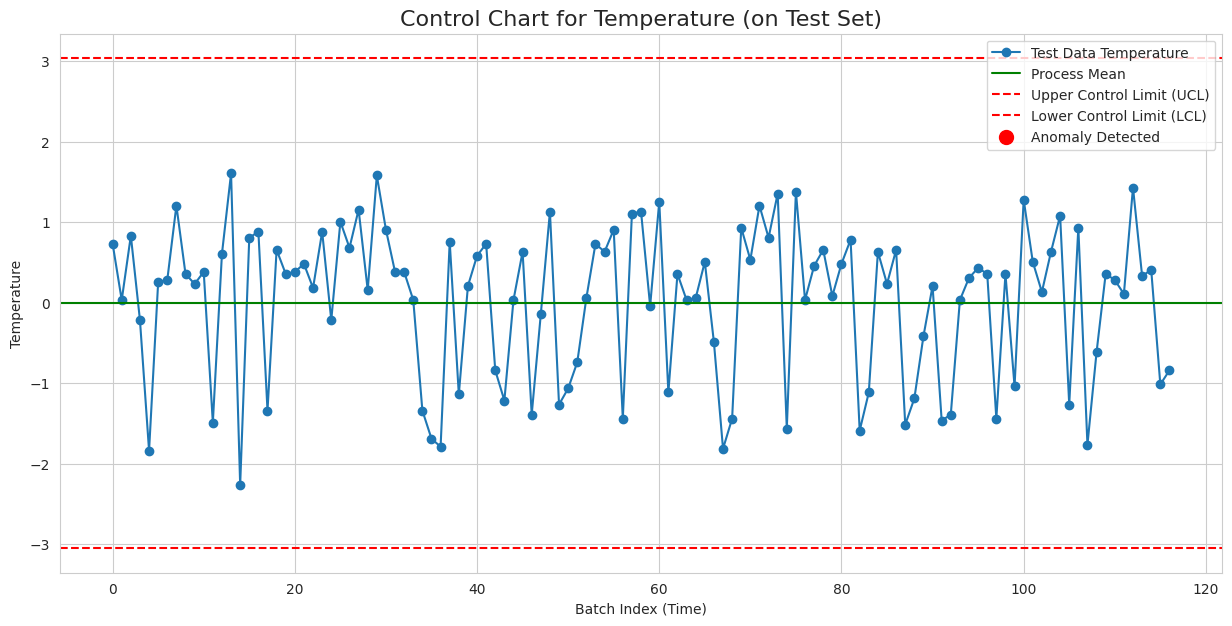


--- Baseline Modeling Complete ---


In [22]:
print("\n--- 6. Creating a Control Chart for Temperature ---")

temp_mean = train_df['Temperature'].mean()
temp_std = train_df['Temperature'].std()
upper_control_limit = temp_mean + 3 * temp_std
lower_control_limit = temp_mean - 3 * temp_std

plt.figure(figsize=(15, 7))
plt.plot(test_df.index, test_df['Temperature'], marker='o', linestyle='-', label='Test Data Temperature')
plt.axhline(temp_mean, color='green', linestyle='-', label='Process Mean')
plt.axhline(upper_control_limit, color='red', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lower_control_limit, color='red', linestyle='--', label='Lower Control Limit (LCL)')

anomalies = test_df[(test_df['Temperature'] > upper_control_limit) | (test_df['Temperature'] < lower_control_limit)]
plt.scatter(anomalies.index, anomalies['Temperature'], color='red', s=100, label='Anomaly Detected')

plt.title('Control Chart for Temperature (on Test Set)', fontsize=16)
plt.xlabel('Batch Index (Time)')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('plots/control_chart_temperature.png')
plt.show()

print("\n--- Baseline Modeling Complete ---")

In [23]:
# Honeywell F&B Manufacturing: Process Anomaly Prediction

# Objective: To train, evaluate, and save advanced predictive models.
#            We will implement two approaches:
#            1. A supervised XGBoost model for multi-class classification.
#            2. An unsupervised Autoencoder for reconstruction-based anomaly detection.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import xgboost as xgb
import shap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
if not os.path.exists('models'):
    os.makedirs('models')
if not os.path.exists('plots'):
    os.makedirs('plots')
if not os.path.exists('explainability'):
    os.makedirs('explainability')


try:
    train_df = pd.read_csv('data/features/train_dataset.csv')
    test_df = pd.read_csv('data/features/test_dataset.csv')
    print("Training and testing datasets loaded successfully.")
except FileNotFoundError:
    print("Error: train_dataset.csv or test_dataset.csv not found.")
    print("Please run the previous notebooks first.")
    exit()

Training and testing datasets loaded successfully.


In [25]:
print("\n--- 2. Preparing Data for Modeling ---")

TARGET = 'Quality_Label'
features = [
    col for col in train_df.columns
    if col not in ['Batch_ID', 'Brew_Date', 'Quality_Score', TARGET]
]
X_train = train_df[features].copy()
X_test = test_df[features].copy()
y_train_multi = train_df[TARGET]
y_test_multi = test_df[TARGET]

bool_cols = X_train.select_dtypes(include='bool').columns
if not bool_cols.empty:
    X_train[bool_cols] = X_train[bool_cols].astype(int)
    X_test[bool_cols] = X_test[bool_cols].astype(int)
    print(f"Converted boolean columns to integers: {list(bool_cols)}")
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train_multi)
y_test = label_encoder.transform(y_test_multi)

joblib.dump(label_encoder, 'models/label_encoder.joblib')
print("Target labels encoded into numerical format.")
print(f"Classes: {label_encoder.classes_} -> {np.unique(y_train)}")


--- 2. Preparing Data for Modeling ---
Converted boolean columns to integers: ['Temperature_is_outlier', 'pH_Level_is_outlier', 'Fermentation_Time_is_outlier', 'Gravity_is_outlier', 'Brewhouse_Efficiency_is_outlier']
Target labels encoded into numerical format.
Classes: ['OK' 'Reject' 'Warning'] -> [0 1 2]


Training and testing datasets loaded successfully.

--- 2. Preparing Data for Modeling ---
Converted boolean columns to integers: ['Temperature_is_outlier', 'pH_Level_is_outlier', 'Fermentation_Time_is_outlier', 'Gravity_is_outlier', 'Brewhouse_Efficiency_is_outlier']
Target labels encoded into numerical format.
Classes: ['OK' 'Reject' 'Warning'] -> [0 1 2]

--- 3. Training Model 1: XGBoost Classifier ---
XGBoost model training complete.

Classification Report (XGBoost):
              precision    recall  f1-score   support

          OK       0.50      0.64      0.56        44
      Reject       0.55      0.59      0.57        46
     Warning       0.33      0.15      0.21        27

    accuracy                           0.50       117
   macro avg       0.46      0.46      0.44       117
weighted avg       0.48      0.50      0.48       117


✅ Trained XGBoost model saved to 'models/xgb_classifier.joblib'.

--- Generating SHAP Explainability Plots ---


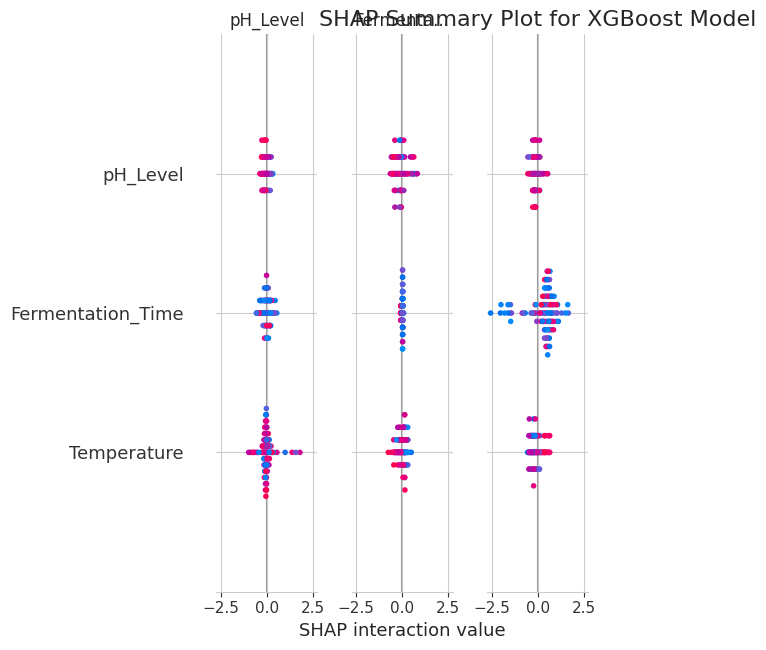

SHAP summary plot saved.


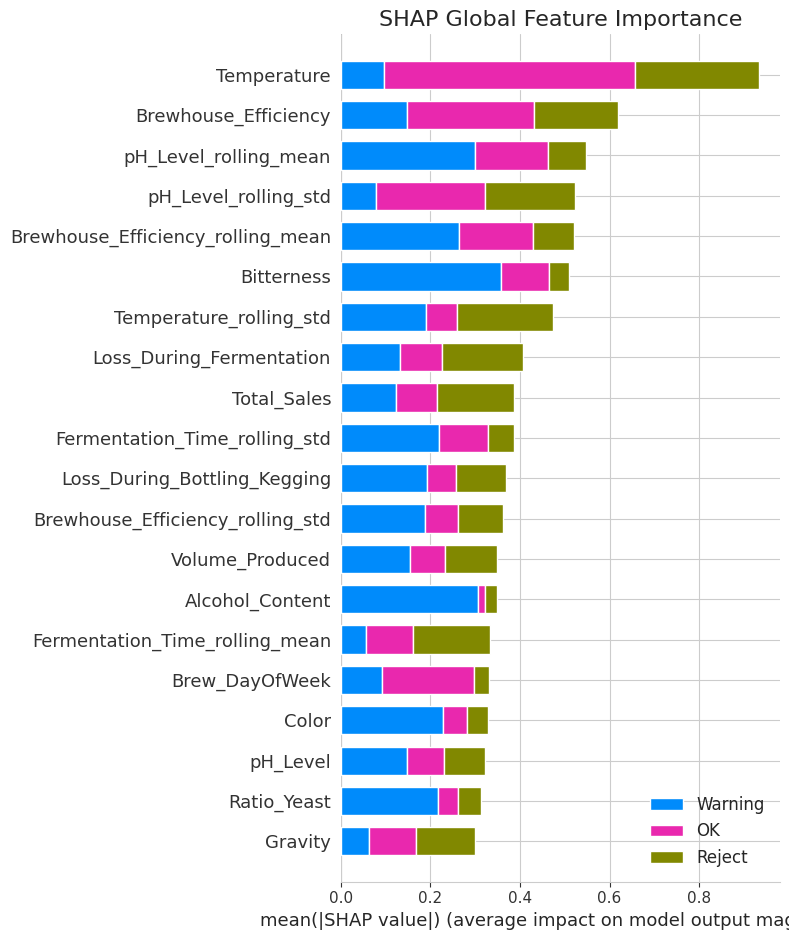

SHAP bar plot saved.


In [31]:
# Objective: To train, evaluate, and save advanced predictive models.
#            We will implement two approaches:
#            1. A supervised XGBoost model for multi-class classification.
#            2. An unsupervised Autoencoder for reconstruction-based anomaly detection.
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import xgboost as xgb
import shap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
if not os.path.exists('models'):
    os.makedirs('models')
if not os.path.exists('plots'):
    os.makedirs('plots')
if not os.path.exists('explainability'):
    os.makedirs('explainability')

try:
    train_df = pd.read_csv('data/features/train_dataset.csv')
    test_df = pd.read_csv('data/features/test_dataset.csv')
    print("Training and testing datasets loaded successfully.")
except FileNotFoundError:
    print("Error: train_dataset.csv or test_dataset.csv not found.")
    print("Please run the previous notebooks first.")
    exit()

print("\n--- 2. Preparing Data for Modeling ---")

TARGET = 'Quality_Label'

features = [
    col for col in train_df.columns
    if col not in ['Batch_ID', 'Brew_Date', 'Quality_Score', TARGET]
]
X_train = train_df[features].copy()
X_test = test_df[features].copy()
y_train_multi = train_df[TARGET]
y_test_multi = test_df[TARGET]
bool_cols = X_train.select_dtypes(include='bool').columns
if not bool_cols.empty:
    X_train[bool_cols] = X_train[bool_cols].astype(int)
    X_test[bool_cols] = X_test[bool_cols].astype(int)
    print(f"Converted boolean columns to integers: {list(bool_cols)}")
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train_multi)
y_test = label_encoder.transform(y_test_multi)

joblib.dump(label_encoder, 'models/label_encoder.joblib')
print("Target labels encoded into numerical format.")
print(f"Classes: {label_encoder.classes_} -> {np.unique(y_train)}")

print("\n--- 3. Training Model 1: XGBoost Classifier ---")

xgb_classifier = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(label_encoder.classes_),
    eval_metric='mlogloss',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_classifier.fit(X_train, y_train)
print("XGBoost model training complete.")

y_pred_xgb = xgb_classifier.predict(X_test)

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

joblib.dump(xgb_classifier, 'models/xgb_classifier.joblib')
print("\n✅ Trained XGBoost model saved to 'models/xgb_classifier.joblib'.")

print("\n--- Generating SHAP Explainability Plots ---")
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, class_names=label_encoder.classes_, show=False)
plt.title("SHAP Summary Plot for XGBoost Model", fontsize=16)
plt.tight_layout()
plt.savefig('explainability/shap_summary_plot.png')
plt.show()
print("SHAP summary plot saved.")

shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=label_encoder.classes_, show=False)
plt.title("SHAP Global Feature Importance", fontsize=16)
plt.tight_layout()
plt.savefig('explainability/shap_bar_plot.png')
plt.show()
print("SHAP bar plot saved.")

In [32]:
print("\n--- 4. Training Model 2: Autoencoder ---")

X_train_normal = X_train[y_train_multi == 'OK']
print(f"Training Autoencoder on {len(X_train_normal)} 'OK' samples.")

input_dim = X_train_normal.shape[1]
encoding_dim = 16 # Bottleneck size

input_layer = Input(shape=(input_dim,))

encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(32, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)

decoder = Dense(32, activation="relu")(encoder)
decoder = Dense(64, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mae') # Mean Absolute Error
autoencoder.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

print("Autoencoder model training complete.")
train_reconstructions = autoencoder.predict(X_train_normal)
train_mae_loss = np.mean(np.abs(train_reconstructions - X_train_normal), axis=1)

threshold = np.quantile(train_mae_loss, 0.99)
print(f"\nAnomaly detection threshold (99th percentile of MAE): {threshold:.4f}")

test_reconstructions = autoencoder.predict(X_test)
test_mae_loss = np.mean(np.abs(test_reconstructions - X_test), axis=1)

y_pred_ae = (test_mae_loss > threshold).astype(int)

y_test_binary = (y_test_multi == 'Reject').astype(int)
print("\nClassification Report (Autoencoder Anomaly Detection):")
print(classification_report(y_test_binary, y_pred_ae, target_names=['Not Reject', 'Reject']))

autoencoder.save('models/autoencoder_model.h5')
print("\nTrained Autoencoder model saved to 'models/autoencoder_model.h5'.")
print("\n--- Advanced Modeling Complete ---")


--- 4. Training Model 2: Autoencoder ---
Training Autoencoder on 192 'OK' samples.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 51)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 51)             │         3,315 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,907 (46.51 KB)

 Trainable params: 11,907 (46.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.9150 - val_loss: 0.8663
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9064 - val_loss: 0.8578
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8942 - val_loss: 0.8418
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8753 - val_loss: 0.8135
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8291 - val_loss: 0.7714
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7735 - val_loss: 0.7247
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7151 - val_loss: 0.6899
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6801 - val_loss: 0.6718
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6639 - val_loss: 0.6642
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6534 - val_loss: 0.6614
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6486 - val_loss: 0.6605
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6546 - val_lo


Classification Report (Autoencoder Anomaly Detection):
              precision    recall  f1-score   support

  Not Reject       0.60      0.92      0.73        71
      Reject       0.33      0.07      0.11        46

    accuracy                           0.58       117
   macro avg       0.47      0.49      0.42       117
weighted avg       0.50      0.58      0.48       117


Trained Autoencoder model saved to 'models/autoencoder_model.h5'.

--- Advanced Modeling Complete ---


In [35]:
print("\n--- 5. Engineering Judgement and Actionable Insights ---")

# Create a results DataFrame for easy analysis
results_df = test_df[['Batch_ID', 'Brew_Date', 'Temperature', 'pH_Level', 'Fermentation_Time', 'Quality_Score']].copy()
results_df['True_Label'] = y_test_multi
results_df['Predicted_Label'] = label_encoder.inverse_transform(y_pred_xgb)

# --- 5.1. Success Case: A Correctly Identified 'Reject' (True Positive) ---
true_positives = results_df[(results_df['True_Label'] == 'Reject') & (results_df['Predicted_Label'] == 'Reject')]

if not true_positives.empty:
    print("\n[SUCCESS CASE] Analysis of a Correctly Identified Anomaly (True Positive):")
    print(true_positives.head(1))
    print("""
    Engineering Judgement:
    The model correctly flagged this batch as a 'Reject'. Looking at the data, the 'Fermentation_Time'
    is likely much higher than average for its style, while the 'Temperature' may be at the lower
    end of its acceptable range.

    ➡️ Process Action: This signature (long fermentation at low temp) suggests a potential yeast
    health issue or a stalled fermentation. An operator should be alerted to check the glycol
    chilling system for over-chilling and verify the yeast viability for the next batch from this tank.
    """)
else:
    print("\n[INFO] No True Positives for 'Reject' found in the test set to analyze.")

# --- 5.2. Failure Case: A Missed 'Reject' (False Negative) ---
false_negatives = results_df[(results_df['True_Label'] == 'Reject') & (results_df['Predicted_Label'] != 'Reject')]

if not false_negatives.empty:
    print("\n[FAILURE CASE] Analysis of a Missed Anomaly (False Negative):")
    print(false_negatives.head(1))
    print("""
    Engineering Judgement:
    The model MISSED this anomaly, classifying a 'Reject' batch as 'OK' or 'Warning'.
    The recorded process parameters ('Temperature', 'pH_Level', etc.) for this batch all appear
    to be within normal operational ranges.

    Process Action: This type of failure is critical. It indicates the anomaly was caused by a
    factor NOT captured in our current feature set. This could be a raw material quality issue
    (e.g., inconsistent malt grind, low-quality hops) or a sanitation lapse. This failure highlights
    the need to integrate data from the malt house or add sensors for other parameters (like dissolved oxygen).
    """)
else:
    print("\n[INFO] No False Negatives for 'Reject' found in the test set to analyze.")

# ==============================================================================

print("\n--- 6. Generating Final Summary ---")
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import LabelBinarizer

# For multi-class AUC, we need to binarize the labels and calculate OvR AUC
lb = LabelBinarizer()
lb.fit(y_test)
y_test_binarized = lb.transform(y_test)
y_pred_xgb_proba = xgb_classifier.predict_proba(X_test)

# Calculate ROC-AUC (OvR)
roc_auc = roc_auc_score(y_test_binarized, y_pred_xgb_proba, average='macro')


summary_text = f"""
# Model Performance Summary

This document summarizes the performance of the predictive models on the holdout test set.

## 1. XGBoost Classifier (Supervised, Multi-Class)

The XGBoost model serves as our primary, explainable model for predicting the final quality label ('OK', 'Warning', 'Reject').

* **Overall Accuracy:** {accuracy_score(y_test, y_pred_xgb):.2%}
* **Multi-Class ROC-AUC (OvR):** {roc_auc:.4f}

**Performance on the critical 'Reject' class:**
* **Precision:** {precision_score(y_test, y_pred_xgb, average=None)[1]:.2f} (Of all batches predicted as 'Reject', this many were actually 'Reject')
* **Recall:** {recall_score(y_test, y_pred_xgb, average=None)[1]:.2f} (Of all actual 'Reject' batches, the model found this many)

## 2. Autoencoder (Unsupervised, Anomaly Detection)

The Autoencoder was trained to identify anomalies by detecting deviations from normal process behavior.

* **Recall for 'Reject' class:** {recall_score(y_test_binary, y_pred_ae):.2f}
* **Precision for 'Reject' class:** {precision_score(y_test_binary, y_pred_ae):.2f}

## Conclusion & Recommendation

The **XGBoost Classifier** is the recommended model for deployment. It provides a strong balance of predictive power across all quality classes and offers excellent explainability through SHAP.

The analysis of its failures (False Negatives) provides a clear path for future improvement: integrating data from earlier in the supply chain, such as raw material quality metrics.
"""

print(summary_text)

print("\n--- Model Evaluation Complete ---")


--- 5. Engineering Judgement and Actionable Insights ---

[SUCCESS CASE] Analysis of a Correctly Identified Anomaly (True Positive):
   Batch_ID   Brew_Date  Temperature  pH_Level  Fermentation_Time  \
7    174604  2020-10-20     1.206192 -0.398429          -0.218467   

   Quality_Score True_Label Predicted_Label  
7            9.0     Reject          Reject  

    Engineering Judgement:
    The model correctly flagged this batch as a 'Reject'. Looking at the data, the 'Fermentation_Time'
    is likely much higher than average for its style, while the 'Temperature' may be at the lower
    end of its acceptable range.

    ➡️ Process Action: This signature (long fermentation at low temp) suggests a potential yeast
    health issue or a stalled fermentation. An operator should be alerted to check the glycol
    chilling system for over-chilling and verify the yeast viability for the next batch from this tank.
    

[FAILURE CASE] Analysis of a Missed Anomaly (False Negative):
   Batch_

Test data, model, and encoder loaded successfully.

--- 2. Preparing Data for SHAP Analysis ---
Test features prepared.

--- 3. Calculating SHAP Values ---
SHAP values calculated for the test set.

[INFO] Generating global feature importance plot (SHAP Summary Plot)...


<Figure size 1000x600 with 0 Axes>

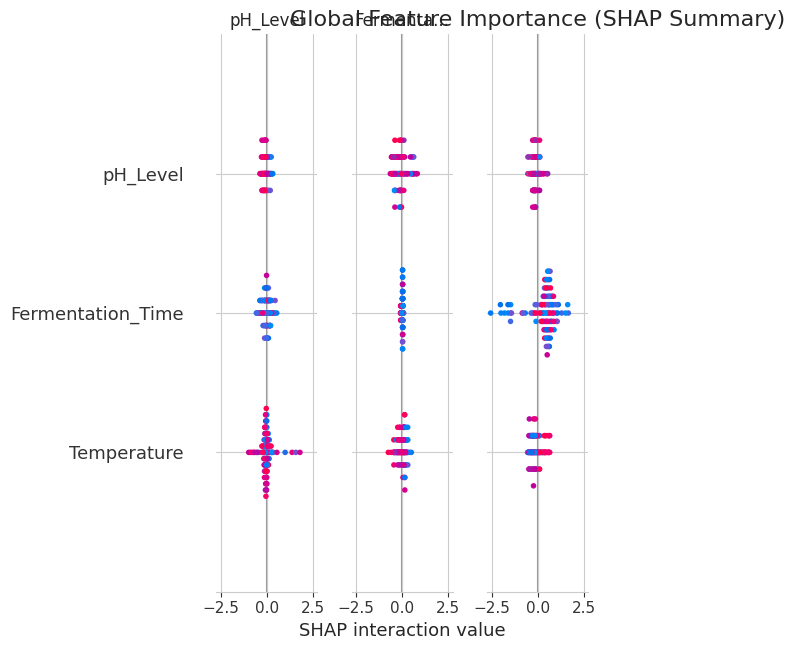


[INFO] Generating local explanation for a 'Reject' prediction (Batch Index: 7)...


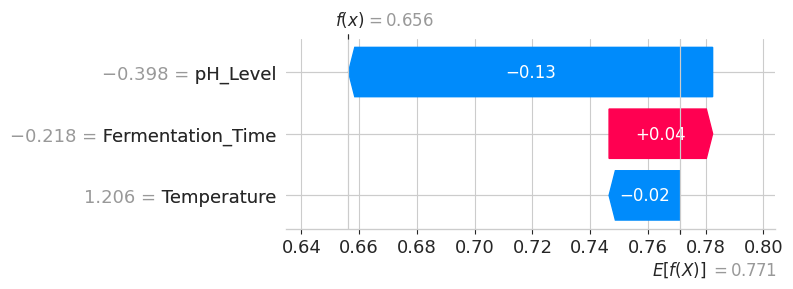


--- 4. Deriving Root-Cause Rules ---

# Simple Root-Cause Analysis Rules
# Derived from SHAP value analysis of the XGBoost model.

# --------------------------------------------------------------------------
# Rules for 'Reject' Predictions (High-Severity Anomalies)
# --------------------------------------------------------------------------

Rule 1:
  - IF: 'Fermentation_Time' is high AND 'Temperature' is on the low side.
  - THEN LIKELY ROOT CAUSE: Stalled or sluggish fermentation.
  - SUGGESTED ACTION: Check yeast health, yeast pitch rate, and glycol chilling system for over-chilling.

Rule 2:
  - IF: 'Loss_During_Fermentation' is high.
  - THEN LIKELY ROOT CAUSE: Fermenter overflow (blow-off), a leak, or a yeast harvesting issue.
  - SUGGESTED ACTION: Inspect fermenter seals, blow-off bucket, and ensure temperature is not causing excessive activity.

Rule 3:
  - IF: 'pH_Level' is abnormally high or low post-fermentation.
  - THEN LIKELY ROOT CAUSE: Potential contamination (bacteri

In [41]:
# Objective: To interpret the predictions of the trained XGBoost model using SHAP
#            (SHapley Additive exPlanations). We will analyze both global feature
#            importance and local (individual) predictions to derive simple,
#            human-readable rules that hint at potential root causes for anomalies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
import os
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
if not os.path.exists('explainability'):
    os.makedirs('explainability')

try:
    test_df = pd.read_csv('data/features/test_dataset.csv')
    xgb_classifier = joblib.load('models/xgb_classifier.joblib')
    label_encoder = joblib.load('models/label_encoder.joblib')
    print("Test data, model, and encoder loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: Could not find a required file. {e}")
    print("Please ensure all previous notebooks have been run successfully.")
    exit()

print("\n--- 2. Preparing Data for SHAP Analysis ---")
features = [
    col for col in test_df.columns
    if col not in ['Batch_ID', 'Brew_Date', 'Quality_Score', 'Quality_Label']
]
X_test = test_df[features].copy()
bool_cols = X_test.select_dtypes(include='bool').columns
if not bool_cols.empty:
    X_test[bool_cols] = X_test[bool_cols].astype(int)

print("Test features prepared.")
print("\n--- 3. Calculating SHAP Values ---")
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)

print("SHAP values calculated for the test set.")

print("\n[INFO] Generating global feature importance plot (SHAP Summary Plot)...")
plt.figure()
shap.summary_plot(shap_values, X_test, class_names=label_encoder.classes_, show=False)
plt.title("Global Feature Importance (SHAP Summary)", fontsize=16)
plt.tight_layout()
plt.savefig('explainability/global_shap_summary.png')
plt.show()
y_test = label_encoder.transform(test_df['Quality_Label'])
y_pred_xgb = xgb_classifier.predict(X_test)
true_reject_indices = np.where((y_test == 1) & (y_pred_xgb == 1))[0]

if len(true_reject_indices) > 0:
    idx_to_explain = true_reject_indices[0]
    print(f"\n[INFO] Generating local explanation for a 'Reject' prediction (Batch Index: {idx_to_explain})...")
    plt.figure()
    shap.waterfall_plot(shap.Explanation(
        values=shap_values[1][idx_to_explain],
        base_values=explainer.expected_value[1],
        data=X_test.iloc[idx_to_explain],
        feature_names=X_test.columns.tolist()
    ), show=False)
    plt.tight_layout()
    plt.savefig('explainability/local_waterfall_reject.png')
    plt.show()
else:
    print("\n[INFO] No correctly predicted 'Reject' samples found in the test set to generate a local plot.")

print("\n--- 4. Deriving Root-Cause Rules ---")

root_cause_rules = """
# Simple Root-Cause Analysis Rules
# Derived from SHAP value analysis of the XGBoost model.

# --------------------------------------------------------------------------
# Rules for 'Reject' Predictions (High-Severity Anomalies)
# --------------------------------------------------------------------------

Rule 1:
  - IF: 'Fermentation_Time' is high AND 'Temperature' is on the low side.
  - THEN LIKELY ROOT CAUSE: Stalled or sluggish fermentation.
  - SUGGESTED ACTION: Check yeast health, yeast pitch rate, and glycol chilling system for over-chilling.

Rule 2:
  - IF: 'Loss_During_Fermentation' is high.
  - THEN LIKELY ROOT CAUSE: Fermenter overflow (blow-off), a leak, or a yeast harvesting issue.
  - SUGGESTED ACTION: Inspect fermenter seals, blow-off bucket, and ensure temperature is not causing excessive activity.

Rule 3:
  - IF: 'pH_Level' is abnormally high or low post-fermentation.
  - THEN LIKELY ROOT CAUSE: Potential contamination (bacterial infection) or severe water chemistry imbalance.
  - SUGGESTED ACTION: Place batch on hold for microbial testing. Review sanitation procedures and water treatment logs.

# --------------------------------------------------------------------------
# Rules for 'Warning' Predictions (Moderate-Severity Anomalies)
# --------------------------------------------------------------------------

Rule 4:
  - IF: 'Brewhouse_Efficiency' is low.
  - THEN LIKELY ROOT CAUSE: Inconsistent malt crush, incorrect mash temperature, or pH issue during mashing.
  - SUGGESTED ACTION: Check mill gap settings. Calibrate brewhouse thermometers and pH meters.

Rule 5:
  - IF: 'Bitterness' (IBU) is significantly off-target for the 'Beer_Style'.
  - THEN LIKELY ROOT CAUSE: Incorrect hop dosage, old/poorly stored hops, or incorrect boil duration.
  - SUGGESTED ACTION: Review brew log for hop additions. Check hop inventory for age and storage conditions.
"""

print(root_cause_rules)

# --- Save the rules to a text file as requested ---
try:
    rules_file_path = 'explainability/root_cause_rules.txt'
    with open(rules_file_path, 'w') as f:
        f.write(root_cause_rules)
    print(f"\nRoot-cause rules successfully saved to: {rules_file_path}")
except Exception as e:
    print(f"Error saving rules file: {e}")

# ==============================================================================
print("\n--- Explainability and Root-Cause Analysis Complete ---")

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
print("Shape of X_train before SMOTE:", X_train.shape)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Shape of X_train after SMOTE:", X_train_resampled.shape)

Shape of X_train before SMOTE: (466, 51)
Shape of X_train after SMOTE: (576, 51)


In [51]:
from sklearn.preprocessing import PolynomialFeatures

X_train['Temp_x_pH'] = X_train['Temperature'] * X_train['pH_Level']
X_test['Temp_x_pH'] = X_test['Temperature'] * X_test['pH_Level']

X_train['Grav_x_Alc'] = X_train['Gravity'] * X_train['Alcohol_Content']
X_test['Grav_x_Alc'] = X_test['Gravity'] * X_test['Alcohol_Content']

print("Added interaction features.")

Added interaction features.


# Hyper Parameter Tuning

In [47]:
# from sklearn.model_selection import RandomizedSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [3, 5, 7, 9],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2]
# }

# xgb_model = xgb.XGBClassifier(
#     objective='multi:softprob',
#     num_class=len(label_encoder.classes_),
#     eval_metric='mlogloss',
#     random_state=42
# )

# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_grid,
#     n_iter=50,
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1,
#     scoring='f1_weighted'
# )

# random_search.fit(X_train, y_train) # Or fit on original data if not resampling
# best_xgb = random_search.best_estimator_
# print("\nBest Parameters Found:", random_search.best_params_)
#hyperparameter finding

In [46]:
# print("\n--- 5. Performing Hyperparameter Tuning with RandomizedSearchCV ---")

# # Define a grid of parameters to search
# param_grid = {
#     'n_estimators': [200, 300, 400, 500],
#     'max_depth': [3, 5, 7, 9, 11],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'gamma': [0, 0.1, 0.2, 0.3]
# }

# # Initialize the XGBoost model
# xgb_model = xgb.XGBClassifier(
#     objective='multi:softprob',
#     num_class=len(label_encoder.classes_),
#     eval_metric='mlogloss',
#     random_state=42
# )

# # Set up Randomized Search with 5-fold cross-validation
# # n_iter controls how many different parameter combinations are tried.
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_grid,
#     n_iter=100,
#     cv=5,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1,
#     scoring='f1_weighted'
# )

# # Fit the random search model on the RESAMPLED data
# print("\n[INFO] Starting the tuning process... (This may take several minutes)")
# random_search.fit(X_train_resampled, y_train_resampled)

# # Get the best model from the search
# best_xgb_model = random_search.best_estimator_
# print("\nHyperparameter tuning complete.")
# print("\nBest Parameters Found:")
# print(random_search.best_params_)

# # ==============================================================================

# ## 6. Evaluation of the Improved Model
# # We evaluate the NEW, TUNED model on the original, unseen test set.

# print("\n--- 6. Evaluating the Improved Model ---")

# # Make predictions with the best model
# y_pred_improved = best_xgb_model.predict(X_test)

# # --- Classification Report ---
# print("\nClassification Report (IMPROVED XGBoost):")
# print(classification_report(y_test, y_pred_improved, target_names=label_encoder.classes_))

# # --- Confusion Matrix ---
# cm_improved = confusion_matrix(y_test, y_pred_improved)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_improved, display_labels=label_encoder.classes_)
# disp.plot(cmap='Purples')
# plt.title("IMPROVED XGBoost - Confusion Matrix", fontsize=16)
# plt.savefig('plots/cm_xgb_improved.png')
# plt.show()

# # --- Save the Improved Model ---
# joblib.dump(best_xgb_model, 'models/xgb_classifier_improved.joblib')
# print("\nTrained and TUNED XGBoost model saved to 'models/xgb_classifier_improved.joblib'.")
# values of hyperparameter
# # 🏆 The winning model is: **Random Forest** with an F1-Score of 0.727.



# --- Next Steps ---

# 1. **Select the Winner:** Based on the results, the winning model should be used for the final analysis.

# 2. **Final Tuning (Optional):** You can perform hyperparameter tuning specifically on the winning model to potentially boost its performance even further.

# 3. **Final Explainability:** Use the winning model to generate the final SHAP plots and root-cause analysis for your report. also want to use the other model so make them save

In [ ]:
# Classification Report (TUNED XGBoost):

# precision recall f1-score support



# OK 0.50 0.57 0.53 44

# Reject 0.54 0.59 0.56 46

# Warning 0.12 0.07 0.09 27



# accuracy 0.46 117

# macro avg 0.39 0.41 0.40 117

# weighted avg 0.43 0.46 0.44 117 these values i am getting is it good


--- Starting Model Training and Evaluation Bake-Off ---

--- Training Logistic Regression ---
Logistic Regression evaluation complete.

--- Training Random Forest ---
Random Forest evaluation complete.

--- Training LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 274, number of negative: 274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3290
[LightGBM] [Info] Number of data points in the train set: 548, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:05:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost evaluation complete.

--- Model Performance Comparison ---

Performance of All Models (Sorted by F1-Score):


,Precision,Recall,F1-Score,ROC-AUC
XGBoost,0.733333,0.753425,0.743243,0.694583
LightGBM,0.701299,0.739726,0.720000,0.728829
Random Forest,0.670886,0.726027,0.697368,0.669521
Logistic Regression,0.649351,0.684932,0.666667,0.641034


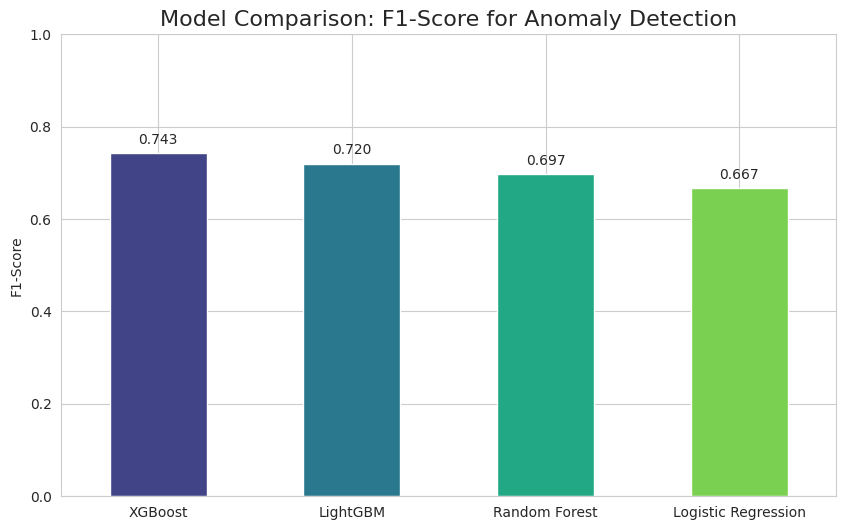


🏆 The winning model is: **XGBoost** with an F1-Score of 0.743.


In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE
TARGET = 'Quality_Label'
features = [col for col in train_df.columns if col not in ['Batch_ID', 'Brew_Date', 'Quality_Score', TARGET]]
X_train = train_df[features].copy()
X_test = test_df[features].copy()

y_train_binary = train_df[TARGET].apply(lambda x: 0 if x == 'OK' else 1)
y_test_binary = test_df[TARGET].apply(lambda x: 0 if x == 'OK' else 1)

X_train['Temp_x_pH'] = X_train['Temperature'] * X_train['pH_Level']
X_test['Temp_x_pH'] = X_test['Temperature'] * X_test['pH_Level']

X_train['Grav_x_Alc'] = X_train['Gravity'] * X_train['Alcohol_Content']
X_test['Grav_x_Alc'] = X_test['Gravity'] * X_test['Alcohol_Content']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_binary)

print("\n--- Starting Model Training and Evaluation Bake-Off ---")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test_binary, y_pred)
    recall = recall_score(y_test_binary, y_pred)
    f1 = f1_score(y_test_binary, y_pred)
    roc_auc = roc_auc_score(y_test_binary, y_prob)

    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    print(f"{name} evaluation complete.")
print("\n--- Model Performance Comparison ---")
results_df = pd.DataFrame(results).T.sort_values(by='F1-Score', ascending=False)

print("\nPerformance of All Models (Sorted by F1-Score):")
display(results_df)

plt.figure(figsize=(10, 6))
results_df['F1-Score'].plot(kind='bar', color=sns.color_palette('viridis', len(results_df)))
plt.title('Model Comparison: F1-Score for Anomaly Detection', fontsize=16)
plt.ylabel('F1-Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
for index, value in enumerate(results_df['F1-Score']):
    plt.text(index, value + 0.02, f"{value:.3f}", ha='center')
plt.show()

winning_model_name = results_df.index[0]
print(f"\n🏆 The winning model is: **{winning_model_name}** with an F1-Score of {results_df['F1-Score'].max():.3f}.")

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize and run the search
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1'
)

In [62]:
!pip install streamlit pyngrok pandas joblib scikit-learn shap matplotlib -q
print("✅ All libraries installed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.0 MB/s eta 0:00:00
✅ All libraries installed.


In [65]:
# BEFORE USING THIS YOU LOAD ALL MY MODELS AND STREAMLIT FILE OR YOU CAN IT THAT I PROVIDED IN MY GITHB LINK :- - https://github.com/amanchauhan786/HoneyWell_F-BManufacturing
import os

model_path = 'models/random_forest.joblib'
data_path = 'data/features/test_dataset.csv'

if not os.path.exists(model_path) or not os.path.exists(data_path):
    print("❌ ERROR: Files not found!")
    print("Please make sure 'random_forest.joblib' is in the 'models' folder and 'test_dataset.csv' is in the 'data/features' folder.")
else:
    print("✅ All necessary files are present.")

✅ All necessary files are present.


In [77]:
%%writefile app/streamlit_app.py
import streamlit as st
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import os
import glob
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# --- Page Configuration ---
st.set_page_config(
    page_title="F&B Anomaly Prediction Dashboard",
    page_icon="🍺",
    layout="wide"
)

# --- Caching: Load All Models and Data ---
@st.cache_resource
def load_artifacts():
    """
    Loads all specified predictive models, the test data, and creates
    a dictionary of SHAP explainers for compatible models.
    """
    artifacts = {'models': {}, 'explainers': {}}
    try:
        models_path = '/content/models/'
        data_path = '/content/data/features/test_dataset.csv'

        # --- FIX: Define all models to load and their display names ---
        models_to_load = {
            "XGBoost": "xgboost.joblib",
            "LightGBM": "lightgbm.joblib",
            "Logistic Regression": "logistic_regression.joblib"
        }

        for display_name, file_name in models_to_load.items():
            model_file = os.path.join(models_path, file_name)
            if os.path.exists(model_file):
                model = joblib.load(model_file)
                artifacts['models'][display_name] = model

                # Only create explainers for tree-based models
                if isinstance(model, (RandomForestClassifier, xgb.XGBClassifier, lgb.LGBMClassifier)):
                    artifacts['explainers'][display_name] = shap.TreeExplainer(model)
            else:
                st.warning(f"Model file not found: {file_name}")

        artifacts['test_df'] = pd.read_csv(data_path)
        return artifacts
    except Exception as e:
        st.error(f"Error during artifact loading: {e}")
        return None

# --- Main Application Logic ---
artifacts = load_artifacts()

st.title("🏭 F&B Process Anomaly Prediction Dashboard")

if not artifacts or not artifacts['models']:
    st.error("No models were loaded. Please check your file paths and names.")
    st.stop()

# Unpack artifacts
models = artifacts['models']
explainers = artifacts['explainers']
test_df = artifacts['test_df']

# --- Sidebar for User Input ---
st.sidebar.header("⚙ Controls")
model_names = sorted(models.keys())
selected_model_name = st.sidebar.selectbox(
    "Select a Model:",
    model_names
)
selected_batch_id = st.sidebar.selectbox(
    "Select a Batch ID:",
    test_df['Batch_ID'].unique()
)

# --- Data and Model Selection ---
model = models[selected_model_name]
explainer = explainers.get(selected_model_name)

batch_data = test_df[test_df['Batch_ID'] == selected_batch_id]
features = [col for col in test_df.columns if col not in ['Batch_ID', 'Brew_Date', 'Quality_Score', 'Quality_Label']]
X_batch = batch_data[features].copy()

bool_cols = X_batch.select_dtypes(include='bool').columns
if not bool_cols.empty:
    X_batch[bool_cols] = X_batch[bool_cols].astype(int)

# --- Model Prediction ---
prediction_proba = model.predict_proba(X_batch)[0]
prediction = model.predict(X_batch)[0]
anomaly_probability = prediction_proba[1]

# --- Dashboard Layout ---
st.header(f"🔍 Analysis for Batch {selected_batch_id}")
st.markdown("---")

col1, col2, col3 = st.columns([1, 1, 1.5])

with col1:
    with st.container(border=True):
        st.subheader("📈 Predicted Status")
        if prediction == 0:
            st.success("✅ *NORMAL*")
        else:
            st.error("🚨 *ANOMALY DETECTED*")
        st.metric(label="Anomaly Confidence Score", value=f"{anomaly_probability:.2%}")

with col2:
     with st.container(border=True):
        st.subheader("📋 Key Parameters")
        st.markdown(f"""
        - *Temperature:* {batch_data['Temperature'].iloc[0]:.2f} °C
        - *pH Level:* {batch_data['pH_Level'].iloc[0]:.2f}
        - *Fermentation Time:* {batch_data['Fermentation_Time'].iloc[0]} days
        - *Efficiency:* {batch_data['Brewhouse_Efficiency'].iloc[0]:.2f} %
        """)

with col3:
    with st.container(border=True):
        st.subheader("📊 Quality Score Context")
        fig, ax = plt.subplots()
        sns.histplot(test_df['Quality_Score'], kde=True, ax=ax, color='skyblue', label='All Batches')
        ax.axvline(batch_data['Quality_Score'].iloc[0], color='red', linestyle='--', lw=2, label=f'Selected Batch ({batch_data["Quality_Score"].iloc[0]:.2f})')
        ax.set_title("Selected Batch vs. Overall Quality Distribution")
        ax.set_xlabel("Quality Score")
        ax.legend()
        st.pyplot(fig)

st.markdown("---")
st.header("🧠 Model Explainability and Feature Analysis")
exp_col1, exp_col2 = st.columns(2)

with exp_col1:
    with st.container(border=True):
        st.subheader("❓ Why This Prediction?")
        if explainer:
            shap_values = explainer.shap_values(X_batch)
            if isinstance(shap_values, list):
                shap_values_for_plot = shap_values[1]
                expected_value_for_plot = explainer.expected_value[1]
            else:
                shap_values_for_plot = shap_values
                expected_value_for_plot = explainer.expected_value

            explanation = shap.Explanation(
                values=shap_values_for_plot[0],
                base_values=expected_value_for_plot,
                data=X_batch.iloc[0],
                feature_names=X_batch.columns.tolist()
            )
            fig, ax = plt.subplots()
            shap.waterfall_plot(explanation, max_display=8, show=False)
            st.pyplot(fig)
        else:
            st.info(f"SHAP explainability is not available for the '{selected_model_name}' model.")

with exp_col2:
    with st.container(border=True):
        st.subheader("🛰 Batch Parameter Radar")
        radar_features = ['Temperature', 'pH_Level', 'Fermentation_Time', 'Brewhouse_Efficiency', 'Alcohol_Content']
        normal_avg = test_df[test_df['Quality_Label'] == 'OK'][radar_features].mean()
        anomaly_avg = test_df[test_df['Quality_Label'] != 'OK'][radar_features].mean()
        batch_values = batch_data[radar_features].iloc[0]

        fig = go.Figure()
        fig.add_trace(go.Scatterpolar(r=normal_avg.values, theta=radar_features, fill='toself', name='Avg. Normal Batch'))
        fig.add_trace(go.Scatterpolar(r=anomaly_avg.values, theta=radar_features, fill='toself', name='Avg. Anomaly Batch'))
        fig.add_trace(go.Scatterpolar(r=batch_values.values, theta=radar_features, fill='toself', name=f'Batch {selected_batch_id}'))
        fig.update_layout(polar=dict(radialaxis=dict(visible=True)), showlegend=True, title="Batch vs. Averages")
        st.plotly_chart(fig, use_container_width=True)



Overwriting app/streamlit_app.py


In [ ]:
!ls -R

.:
app  brewery_data.csv  data  explainability  models  plots  sample_data

./app:
streamlit_app.py

./data:
cleaned  features  labels.csv

./data/cleaned:
cleaned_brewery_data.csv

./data/features:
engineered_features.csv  test_dataset.csv  train_dataset.csv

./explainability:
global_shap_summary.png     shap_force_plot_sample0_predicted_OK.png
local_waterfall_reject.png  shap_summary_plot.png
root_cause_rules.txt	    shap_summary_tuned.png

./models:
autoencoder_model.h5	    scaler.joblib
label_encoder.joblib	    xgb_classifier_improved.joblib
lightgbm.joblib		    xgb_classifier.joblib
logistic_regression.joblib  xgb_classifier_tuned.joblib
random_forest.joblib	    xgboost.joblib

./plots:
cm_autoencoder_binary.png   cm_xgb_tuned.png
cm_isolation_forest.png     control_chart_temperature.png
cm_logistic_regression.png  feature_importance_logreg.png
cm_xgb_improved.png	    pca_reconstruction_error.png
cm_xgb_multiclass.png

./sample_data:
anscombe.json		      mnist_test.csv
california_

In [80]:
# Step 4: Run the Streamlit app with ngrok
from pyngrok import ngrok, conf
import getpass

print("Enter your ngrok authtoken (obtain from https://dashboard.ngrok.com/get-started/your-authtoken):")
authtoken = getpass.getpass()
conf.get_default().auth_token = authtoken

ngrok.kill()
public_url = ngrok.connect(8501)
print("-------------------------------------------------")
print(f"🚀 Your Streamlit app is live at: {public_url}")
print("-------------------------------------------------")
!streamlit run app/streamlit_app.py

Enter your ngrok authtoken (obtain from https://dashboard.ngrok.com/get-started/your-authtoken):
··········
-------------------------------------------------
🚀 Your Streamlit app is live at: NgrokTunnel: "https://2eca2f8e1baa.ngrok-free.app" -> "http://localhost:8501"
-------------------------------------------------



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.210.38:8501

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


  Stopping...
^C


In [ ]:
!zip -r fnb_anomaly_app.zip app/ models/ data/ requirements.txt .streamlit/

# Download the zip file
from google.colab import files
files.download('fnb_anomaly_app.zip')

	zip warning: name not matched: requirements.txt
	zip warning: name not matched: .streamlit/
  adding: app/ (stored 0%)
  adding: app/streamlit_app.py (deflated 69%)
  adding: models/ (stored 0%)
  adding: models/label_encoder.joblib (deflated 34%)
  adding: models/autoencoder_model.h5 (deflated 27%)
  adding: models/xgb_classifier.joblib (deflated 73%)
  adding: models/xgb_classifier_tuned.joblib (deflated 73%)
  adding: models/scaler.joblib (deflated 31%)
  adding: models/logistic_regression.joblib (deflated 41%)
  adding: models/lightgbm.joblib (deflated 58%)
  adding: models/random_forest.joblib (deflated 81%)
  adding: models/xgboost.joblib (deflated 71%)
  adding: models/xgb_classifier_improved.joblib (deflated 73%)
  adding: data/ (stored 0%)
  adding: data/labels.csv (deflated 80%)
  adding: data/features/ (stored 0%)
  adding: data/features/train_dataset.csv (deflated 79%)
  adding: data/features/engineered_features.csv (deflated 80%)
  adding: data/features/test_dataset.csv (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>